ЛАБОРАТОРНАЯ РАБОТА №1

Фамилия: Абдрахманова 
    
Имя: Нелли
    
Отчество: Тагировна
    
ВУЗ: МГУ
    
Факультет: мехмат
    
Курс: 4
    
Кафедра: Теории динамических систем
    
Научный руководитель: Асташов Е.А.

### Введение в Keras

Цели лабораторной работы: 
- разобраться с интерфейсом слоёв, участвующих в построении нейронной сети
- научиться обучать нейронные сети

In [0]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

print(keras.__version__)
print(tf.__version__)

#### Подготовка данных

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

index = 1238
plt.imshow(X_train[index,0, :,:])
plt.show()

print(np.max(X_train[index,0, :,:]), np.min(X_train[index,0, :,:]), np.dtype(np.max(X_train[index,0, :,:])))
print(Y_train[index])
print(np.argmax(Y_train[index]))

#### 1. (1 балл) Обучите простейшую однослойную нейронную сеть. Какой максимальный результат на тесте вам удалось достичь? Параметры обучения можно менять

In [0]:
# код, на котором достигается эта точность
input_image = Input(shape=(1,28,28))
flatten = Flatten()(input_image)
dense2 = Dense(10, activation='softmax')(flatten)
model = Model(inputs=input_image, outputs=dense2)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, nb_epoch=50, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

In [0]:
# ваша точность на тесте: 0.9251

#### 2. (2 балла) Обучите двуслойную полносвязную сеть. Какой максимальный результат на тесте вам удалось достичь?

In [0]:
# ваша точность на тесте: 0.9826

Стало заметно лучше.

In [0]:
# ваш код, на котором достигается эта точность
input_image = Input(shape=(1,28,28))
flatten = Flatten()(input_image)
dense2 = Dense(512, activation='relu')(flatten)
dense3 = Dense(10, activation='softmax')(dense2)
model = Model(inputs=input_image, outputs=dense3)

#код обучения разрешается исправлять
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, nb_epoch=60, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

#### 3. (2 балла) Обучите трёхслойную полносвязную сеть. Какой максимальный результат на тесте вам удалось достичь?

In [0]:
# ваша точность на тесте: 0.982



Модель стала работать быстрее: двуслойная сеть получила такую оценку за примерно за 21 минуту, а трёхслойная примерно за 16 минут.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


[0.06383816511751211, 0.982]


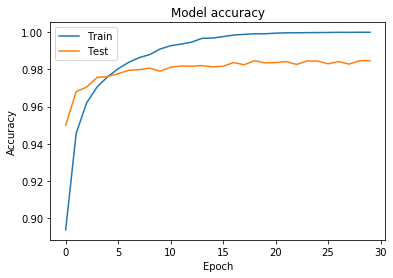

In [7]:
# ваш код, на котором достигается эта точность
input_image = Input(shape=(1,28,28))
flatten = Flatten()(input_image)
dense2 = Dense(512, activation='relu')(flatten)
dense3 = Dense(512, activation='relu')(dense2)
dense4 = Dense(10, activation='softmax')(dense3)
model = Model(inputs=input_image, outputs=dense4)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, nb_epoch=30, verbose=0)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 4. (3 балла) Улучшится ли ваш результат, есть в сеть добавить слои нормализации (dropout, batchnorm  и др.)?

In [0]:
# ваша точность на тесте: 0.9854

Да, и по графику видно, что модель лучше.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


[0.05297573713088641, 0.9854]


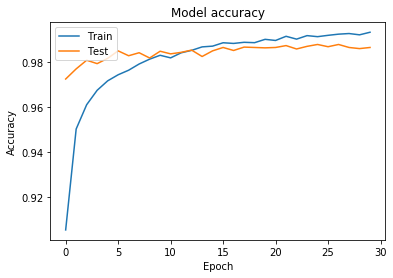

In [8]:
# ваш код, на котором достигается эта точность
input_image = Input(shape=(1,28,28))
inp_norm = BatchNormalization(axis=1)(input_image)
flatten = Flatten()(input_image)
dense2 = Dense(512, activation='relu')(flatten)
norm_2 = BatchNormalization(axis=1)(dense2)
drop_2 = Dropout(rate=0.2)(norm_2)
dense3 = Dense(512, activation='relu')(drop_2)
dense4 = Dense(10, activation='softmax')(dense3)
model = Model(inputs=input_image, outputs=dense4)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, nb_epoch=30, verbose=0)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 5. (4 баллов) Обучите полносвязную нейронную сеть (без свёрточных слоёв), достигающую лучшего качества на тесте без ограничений на количество слоёв?

In [0]:
# ваша точность на тесте: 0.9881

In [0]:
# ваш код, на котором достигается эта точность
input_image = Input(shape=(1,28,28))
inp_norm = BatchNormalization(axis=1)(input_image)
flatten = Flatten()(input_image)
dense2 = Dense(512, activation='relu')(flatten)
norm_2 = BatchNormalization(axis=1)(dense2)
drop_2 = Dropout(rate=0.2)(norm_2)
dense3 = Dense(512, activation='relu')(drop_2)
norm_3 = BatchNormalization(axis=1)(dense3)
drop_3 = Dropout(rate=0.2)(norm_3)
dense4 = Dense(512, activation='relu')(drop_3)
dense5 = Dense(10, activation='softmax')(dense4)
model = Model(inputs=input_image, outputs=dense5)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, nb_epoch=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

#### 6. (3 баллов) Обучите  нейронную сеть с  одним свёрточным слоем,  достигающую лучшего качества на тесте без ограничений на общее количество слоёв? Слой субдискретизации можно использовать в неограниченном количестве.

In [0]:
# ваша точность на тесте: 0.9919

In [0]:
# код, на котором достигается эта точность
input_image = Input(shape=(1,28,28))
inp_norm = BatchNormalization(axis=1)(input_image)
conv = Convolution2D(32, (3,3), padding='same', data_format="channels_first", activation='relu')(input_image)
norm_1 = BatchNormalization(axis=1)(conv)
pool_1 = MaxPooling2D((2,2), strides=2, data_format='channels_first')(norm_1)
drop_1 = Dropout(rate=0.2)(pool_1)
flatten = Flatten()(drop_1)
dense2 = Dense(512, activation='relu')(flatten)
norm_2 = BatchNormalization(axis=1)(dense2)
drop_2 = Dropout(rate=0.2)(norm_2)
dense3 = Dense(512, activation='relu')(drop_2)
dense4 = Dense(10, activation='softmax')(dense3)
model = Model(inputs=input_image, outputs=dense4)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.1, batch_size=10, nb_epoch=30, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

#### 7. (5 баллов) Обучите лучшую нейронную сеть следующими оптимизаторами: SGD, SGD + Momentum, SGD + NAG, AdaGrad, Adadelta, RMSprop, Adam. Какой оптимизатор позволяет достигнуть наибольшего качества на тесте? Какой оптимизатор сходится быстрее?

**Наилучшего качества позволяет достигнуть оптимизатор sgd, и он же быстрее всех сходится (код в предыдущем пункте)**

Что получилось (отсортируем в порядке скорости): 

*   SGD: 0.9919
*   SGD + NAG: 0.9903
*   SGD + momentum (=0.01): 0.9908
*   AdaGrad: 0.9908
*   RMSprop: 0.985
*   Adam: 0.9874
*   Adadelta: 0.9903